In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

Import the data into a Data Frame

In [2]:
df = pd.read_csv('Data/train.csv')
df2 = df.copy()

train=pd.read_csv('Data/train.csv')
test=pd.read_csv('Data/test.csv')

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train.shape

(1460, 81)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
corr = train.corr()
corr.style.background_gradient()


In [7]:
def find_missing_percent(data):
    """
    Returns dataframe containing the total missing values and percentage of total
    missing values of a column.
    """
    miss_df = pd.DataFrame({'ColumnName':[],'TotalMissingVals':[],'PercentMissing':[]})
    for col in data.columns:
        sum_miss_val = data[col].isnull().sum()
        percent_miss_val = round((sum_miss_val/data.shape[0])*100,2)
        miss_df = miss_df.append(dict(zip(miss_df.columns,[col,sum_miss_val,percent_miss_val])),ignore_index=True)
    return miss_df

In [8]:
miss_df = find_missing_percent(df2)
'''Displays columns with missing values'''
display(miss_df[miss_df['PercentMissing']>0.0])
print("\n")

print("Number of columns with missing values:"+(str(miss_df[miss_df['PercentMissing']>0.0].shape[0])))

,ColumnName,TotalMissingVals,PercentMissing
3,LotFrontage,259.0,17.74
6,Alley,1369.0,93.77
25,MasVnrType,8.0,0.55
26,MasVnrArea,8.0,0.55
30,BsmtQual,37.0,2.53
31,BsmtCond,37.0,2.53
32,BsmtExposure,38.0,2.60
33,BsmtFinType1,37.0,2.53
35,BsmtFinType2,38.0,2.60
42,Electrical,1.0,0.07




Number of columns with missing values:19


In [9]:
drop_cols = miss_df[miss_df['PercentMissing'] >70.0].ColumnName.tolist()

print("Number of columns with more than 70%:"+ str(len(drop_cols)))
train = train.drop(drop_cols,axis=1)
#test = test.drop(drop_cols,axis =1)

miss_df = miss_df[miss_df['ColumnName'].isin(train.columns)]
'''Columns to Impute'''
impute_cols = miss_df[miss_df['TotalMissingVals']>0.0].ColumnName.tolist()
miss_df[miss_df['TotalMissingVals']>0.0]

Number of columns with more than 70%:4


,ColumnName,TotalMissingVals,PercentMissing
3,LotFrontage,259.0,17.74
25,MasVnrType,8.0,0.55
26,MasVnrArea,8.0,0.55
30,BsmtQual,37.0,2.53
31,BsmtCond,37.0,2.53
32,BsmtExposure,38.0,2.60
33,BsmtFinType1,37.0,2.53
35,BsmtFinType2,38.0,2.60
42,Electrical,1.0,0.07
57,FireplaceQu,690.0,47.26


In [10]:
train.shape

(1460, 77)

In [11]:
train.Neighborhood.value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

In [12]:
train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


## Data pre-processing
We will build a pipeline to do some of the following tasks:

- Missing data
- Feature scaling (important for certain model such as Gradient Descent based models)
- Categorical feature encoding
- Outlier removal
- Transformation
- Custom processing

BldgType: Type of dwelling
		
       1Fam	Single-family Detached	
       2FmCon	Two-family Conversion; originally built as one-family dwelling
       Duplx	Duplex
       TwnhsE	Townhouse End Unit
       TwnhsI	Townhouse Inside Unit
	
HouseStyle: Style of dwelling
	
       1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl	Split Level

In [13]:
def plot_histogram(train, col1, col2, cols_list, last_one =False):
    """
    Plot the histogram for the numerical columns. The bin width
    is calculated by Freedman Diaconis Rule and Sturges rule.
    
    Freedman-Diaconis Rule:
    Freedman-Diaconis Rule is a rule to find the optimal number of bins.
    Bin width: (2 * IQR)/(N^1/3)
    N - Size of the data
    Number of bins : (Range/ bin-width)
    
    Disadvantage: The IQR might be zero for certain columns. In
    that case the bin width might be equal to infinity. In that case 
    the actual range of the data is returned as bin width.
    
    Sturges Rule:
    Sturges Rule is a rule to find the optimal number of bins.
    Bin width: (Range/ bin-width)
    N - Size of the data
    Number of bins : ceil(log2(N))+1
    
    """
    if(col1 in cols_list):
        freq1, bin_edges1 = np.histogram(train[col1],bins='sturges')
    else:
        freq1, bin_edges1 = np.histogram(train[col1],bins='fd')
    if(col2 in cols_list):
        freq2, bin_edges2 = np.histogram(train[col2],bins='sturges')
    else:
        freq2, bin_edges2 = np.histogram(train[col2],bins='fd')
        
    if(last_one!=True):
        plt.figure(figsize=(45,18))  
        ax1 = plt.subplot(1,2,1)
        ax1.set_title(col1,fontsize=45)
        ax1.set_xlabel(col1,fontsize=40)
        ax1.set_ylabel('Frequency',fontsize=40)
        train[col1].hist(bins=bin_edges1,ax = ax1, xlabelsize=30, ylabelsize=30)
        
    else:
        plt.figure(figsize=(20,10))
        ax1 = plt.subplot(1,2,1)
        ax1.set_title(col1,fontsize=25)
        ax1.set_xlabel(col1,fontsize=20)
        ax1.set_ylabel('Frequency',fontsize=20)
        train[col1].hist(bins=bin_edges1,ax = ax1, xlabelsize=15, ylabelsize=15)
    
    if(last_one != True):
        ax2 = plt.subplot(1,2,2)
        ax2.set_title(col2,fontsize=45)
        ax2.set_xlabel(col2,fontsize=40)
        ax2.set_ylabel('Frequency',fontsize=40)
        train[col2].hist(bins=bin_edges2, ax = ax2, xlabelsize=30, ylabelsize=30)

In [14]:
numeric_cols = train.select_dtypes(['float','int']).columns

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000021CF18BC4C0>],
      dtype=object)

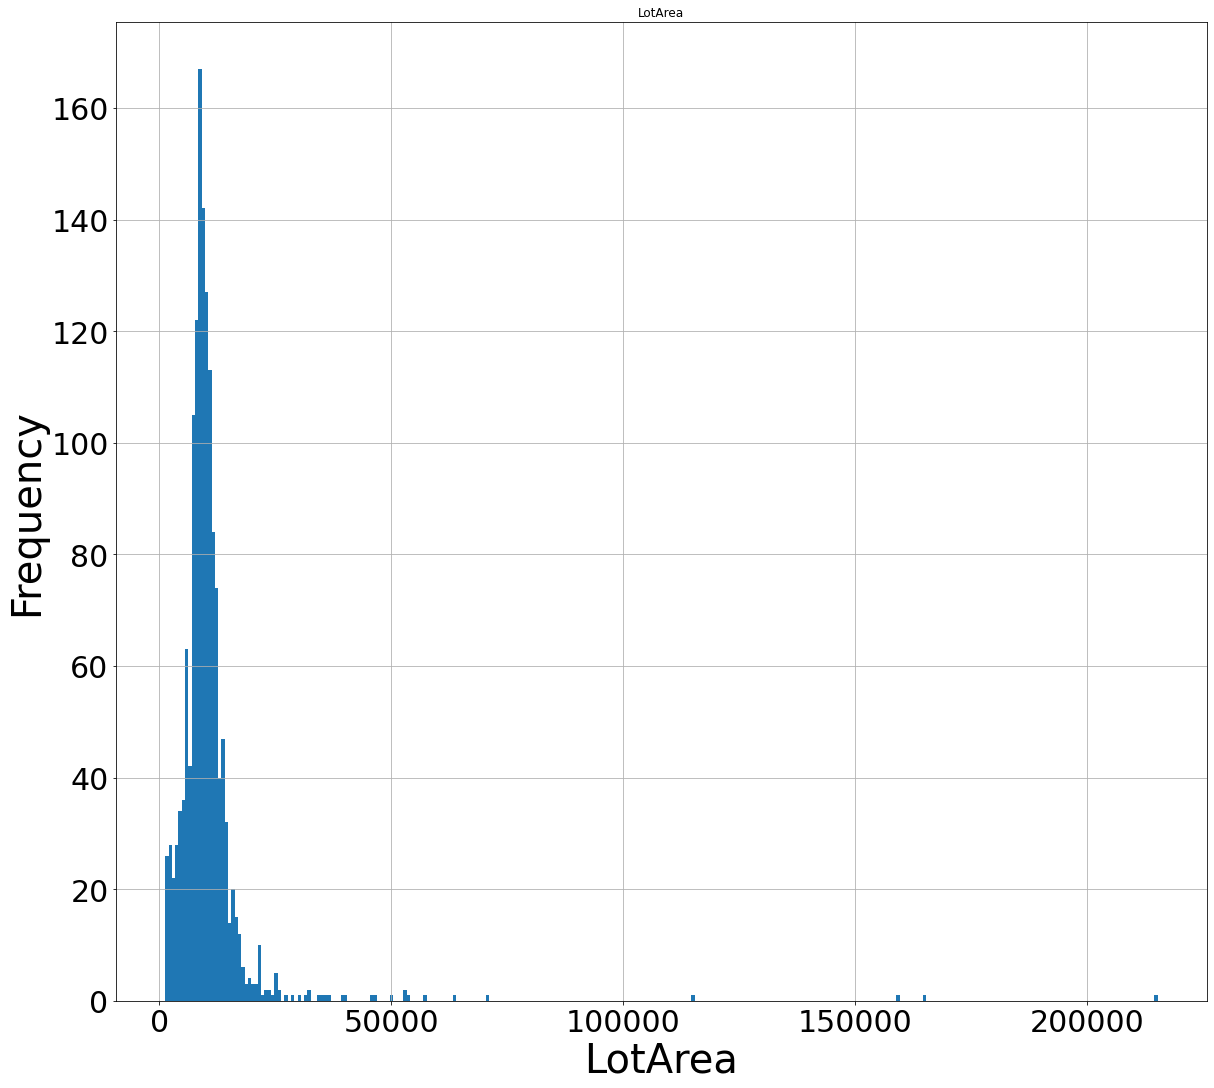

In [15]:
freq1, bin_edges1=np.histogram(train.LotArea, bins='fd')

plt.figure(figsize=(45,18))  
ax1 = plt.subplot(1,2,1)
ax1.set_title('LotArea',fontsize=45)
ax1.set_xlabel('LotArea',fontsize=40)
ax1.set_ylabel('Frequency',fontsize=40)
train[['LotArea']].hist(bins=bin_edges1,ax = ax1, xlabelsize=30, ylabelsize=30)

In [16]:
# Dropping lotArea greater than 50000 to remove outlier 

train = train[train.LotArea <= 50000].copy()
train.shape

(1449, 77)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000021CF1AC17F0>],
      dtype=object)

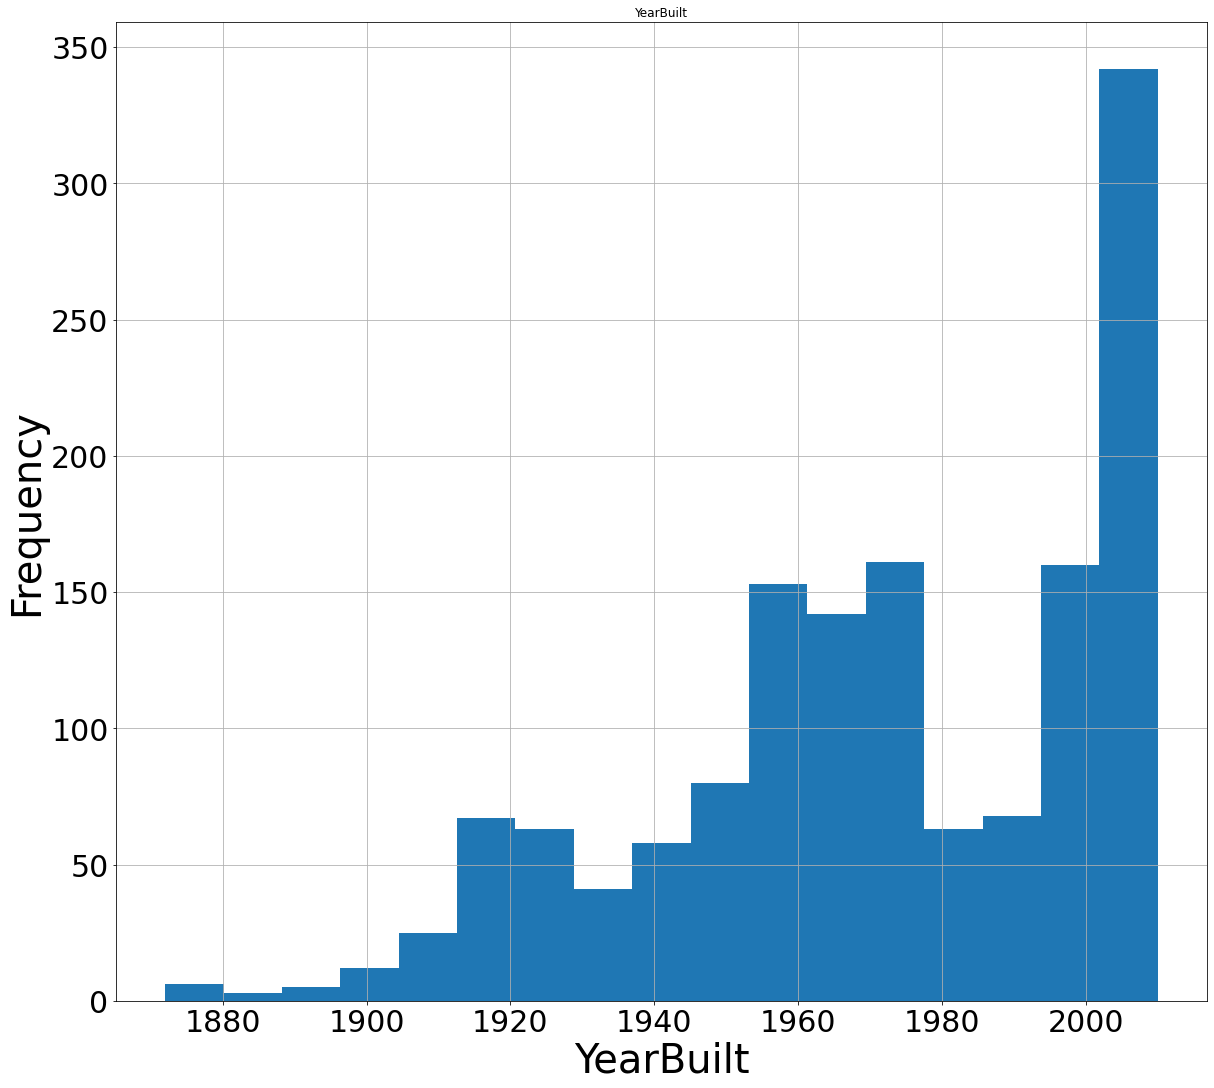

In [17]:
freq1, bin_edges1=np.histogram(train.YearBuilt, bins='fd')

plt.figure(figsize=(45,18))  
ax1 = plt.subplot(1,2,1)
ax1.set_title('YearBuilt',fontsize=45)
ax1.set_xlabel('YearBuilt',fontsize=40)
ax1.set_ylabel('Frequency',fontsize=40)
train[['YearBuilt']].hist(bins=bin_edges1,ax = ax1, xlabelsize=30, ylabelsize=30)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000021CF19D10A0>],
      dtype=object)

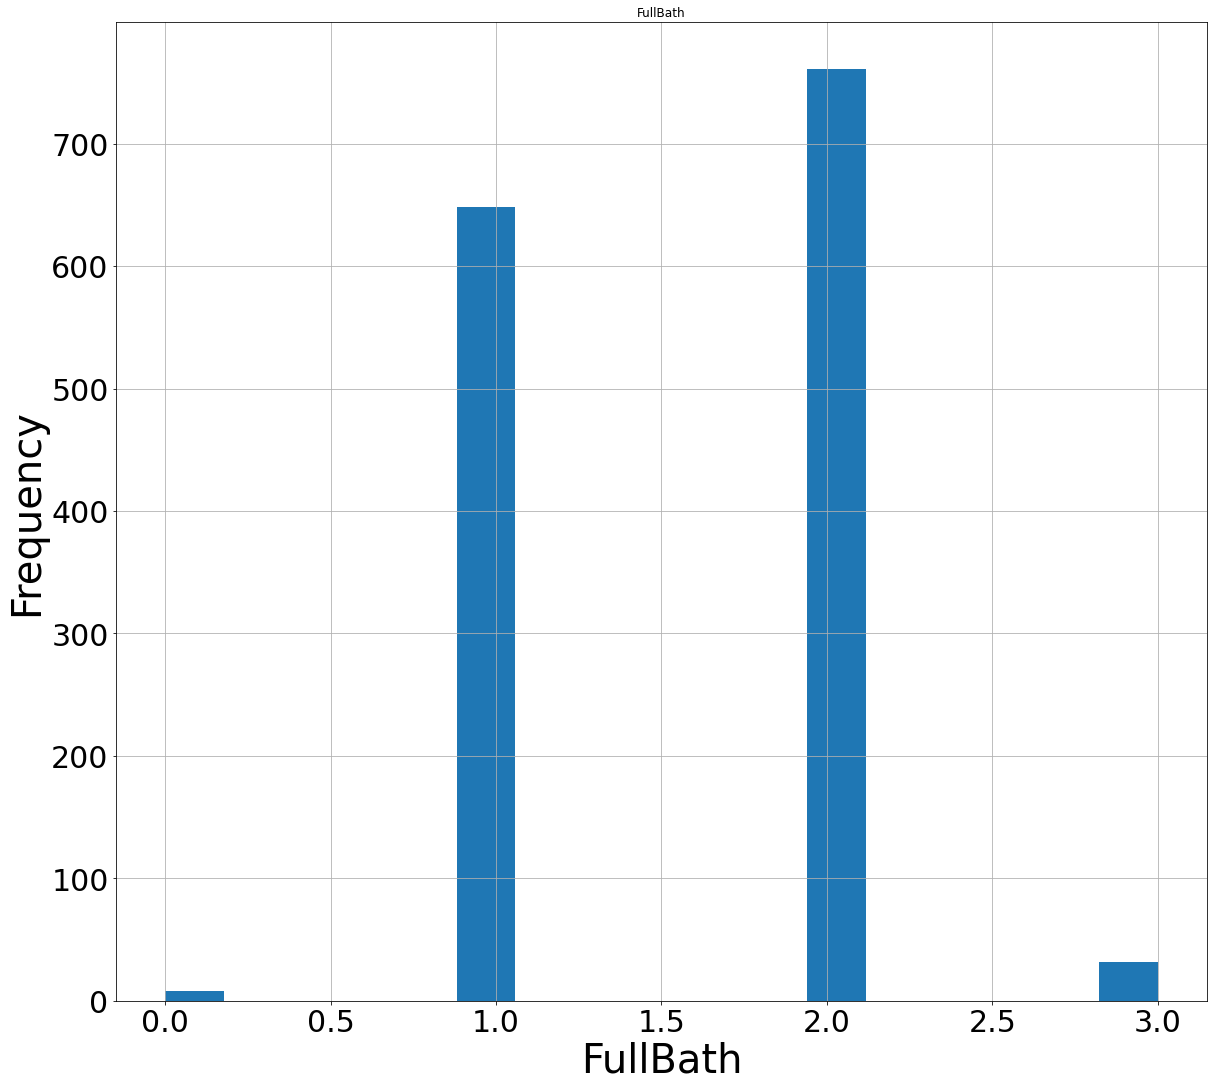

In [18]:
freq1, bin_edges1=np.histogram(train.FullBath, bins='fd')

plt.figure(figsize=(45,18))  
ax1 = plt.subplot(1,2,1)
ax1.set_title('FullBath',fontsize=45)
ax1.set_xlabel('FullBath',fontsize=40)
ax1.set_ylabel('Frequency',fontsize=40)
train[['FullBath']].hist(bins=bin_edges1,ax = ax1, xlabelsize=30, ylabelsize=30)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000021CF24639A0>],
      dtype=object)

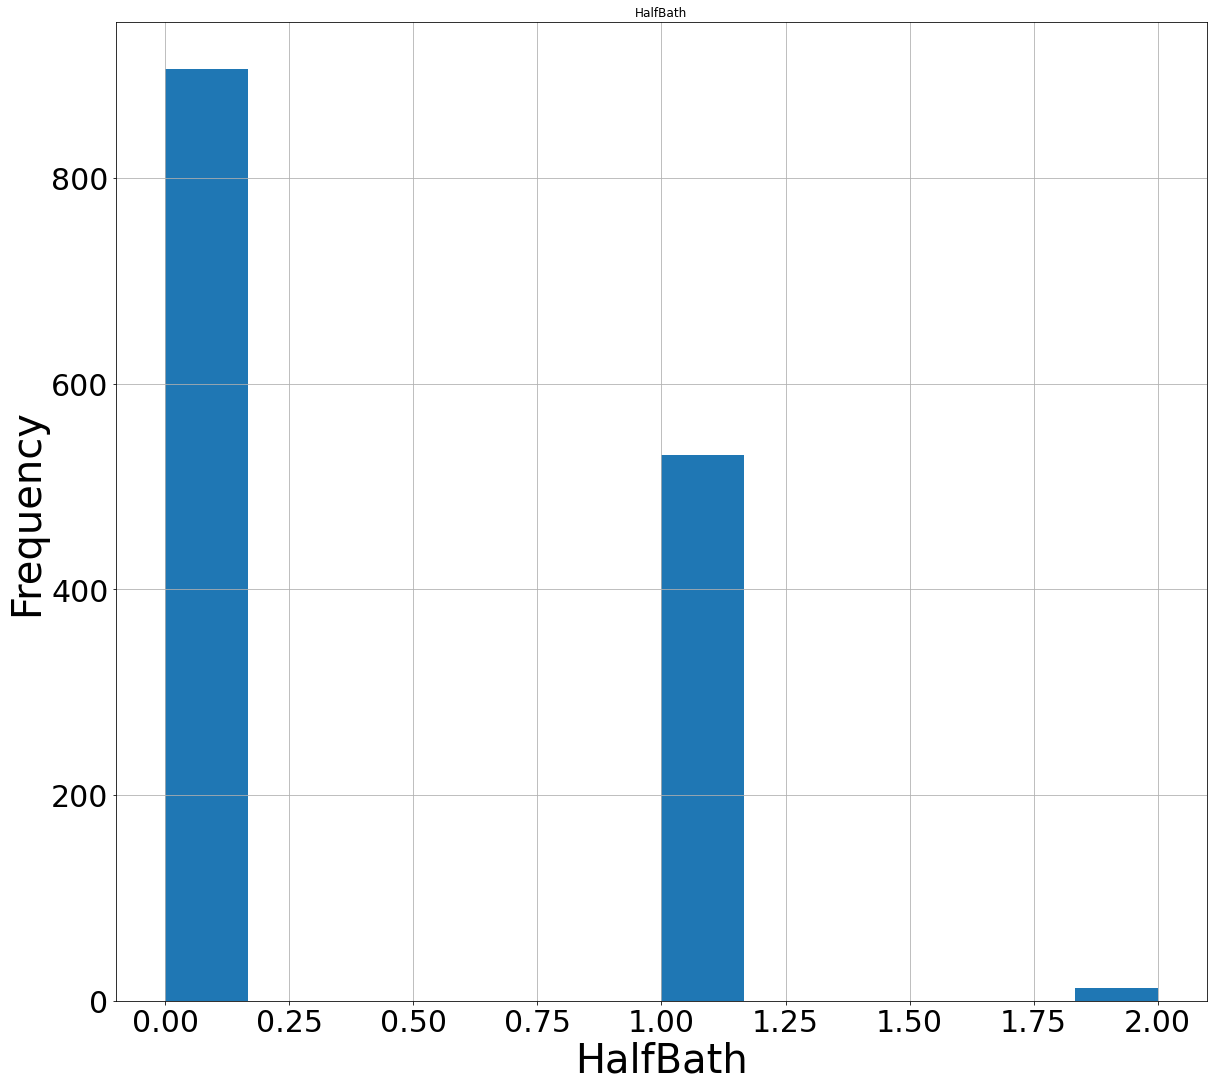

In [19]:
freq1, bin_edges1=np.histogram(train.HalfBath, bins='fd')

plt.figure(figsize=(45,18))  
ax1 = plt.subplot(1,2,1)
ax1.set_title('HalfBath',fontsize=45)
ax1.set_xlabel('HalfBath',fontsize=40)
ax1.set_ylabel('Frequency',fontsize=40)
train[['HalfBath']].hist(bins=bin_edges1,ax = ax1, xlabelsize=30, ylabelsize=30)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000021CF1B5C880>],
      dtype=object)

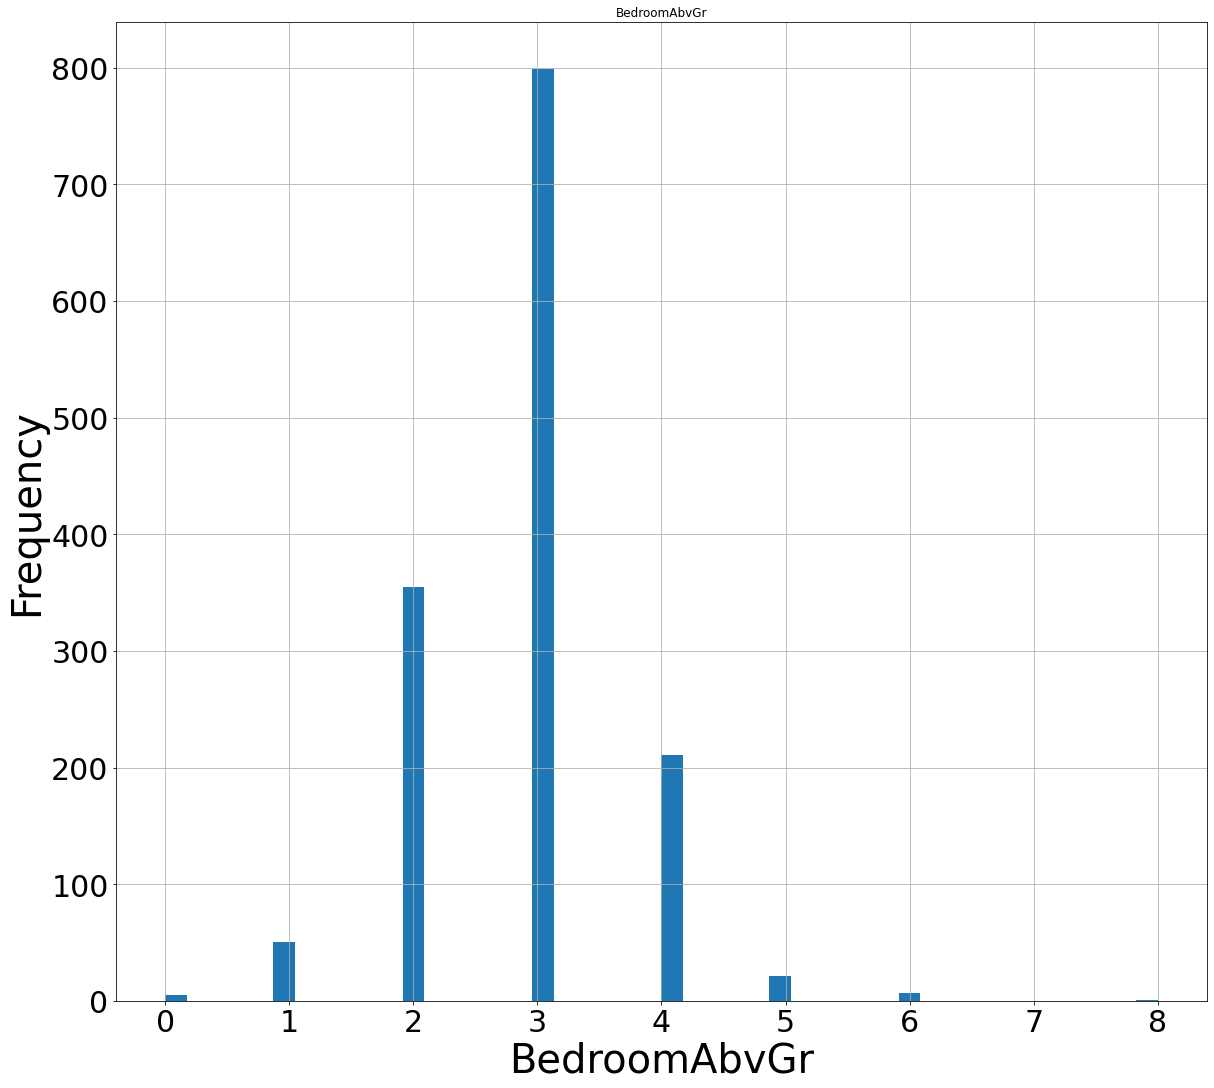

In [20]:
freq1, bin_edges1=np.histogram(train.BedroomAbvGr, bins='fd')

plt.figure(figsize=(45,18))  
ax1 = plt.subplot(1,2,1)
ax1.set_title('BedroomAbvGr',fontsize=45)
ax1.set_xlabel('BedroomAbvGr',fontsize=40)
ax1.set_ylabel('Frequency',fontsize=40)
train[['BedroomAbvGr']].hist(bins=bin_edges1,ax = ax1, xlabelsize=30, ylabelsize=30)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000021CF2377C10>],
      dtype=object)

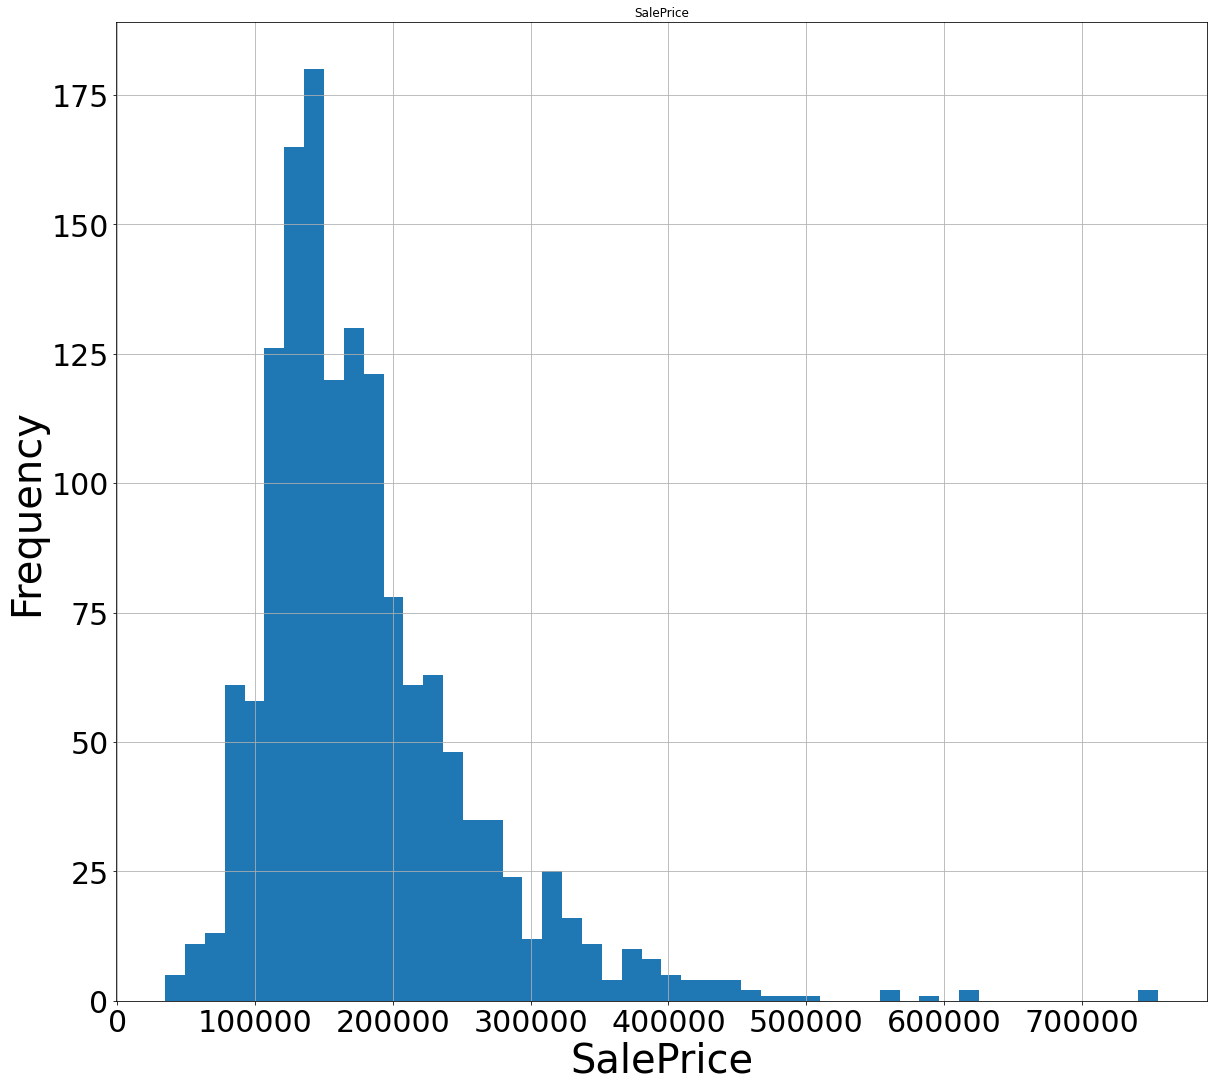

In [21]:
freq1, bin_edges1=np.histogram(train.SalePrice, bins='fd')

plt.figure(figsize=(45,18))  
ax1 = plt.subplot(1,2,1)
ax1.set_title('SalePrice',fontsize=45)
ax1.set_xlabel('SalePrice',fontsize=40)
ax1.set_ylabel('Frequency',fontsize=40)
train[['SalePrice']].hist(bins=bin_edges1,ax = ax1, xlabelsize=30, ylabelsize=30)

In [22]:
df3=train[['LotArea','BldgType','HouseStyle','YearBuilt','FullBath','HalfBath','BedroomAbvGr']].copy()

In [23]:
df3.describe()

,LotArea,YearBuilt,FullBath,HalfBath,BedroomAbvGr
count,1449.000000,1449.000000,1449.000000,1449.000000,1449.000000
mean,9867.879917,1971.242926,1.563837,0.383023,2.868185
std,4578.300353,30.271932,0.548947,0.503045,0.813314
min,1300.000000,1872.000000,0.000000,0.000000,0.000000
25%,7500.000000,1954.000000,1.000000,0.000000,2.000000
50%,9450.000000,1973.000000,2.000000,0.000000,3.000000
75%,11500.000000,2000.000000,2.000000,1.000000,3.000000
max,46589.000000,2010.000000,3.000000,2.000000,8.000000


In [24]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1449 entries, 0 to 1459
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   LotArea       1449 non-null   int64 
 1   BldgType      1449 non-null   object
 2   HouseStyle    1449 non-null   object
 3   YearBuilt     1449 non-null   int64 
 4   FullBath      1449 non-null   int64 
 5   HalfBath      1449 non-null   int64 
 6   BedroomAbvGr  1449 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 90.6+ KB


In [25]:
df3.isnull().sum()

LotArea         0
BldgType        0
HouseStyle      0
YearBuilt       0
FullBath        0
HalfBath        0
BedroomAbvGr    0
dtype: int64

In [26]:
df3.corr()

,LotArea,YearBuilt,FullBath,HalfBath,BedroomAbvGr
LotArea,1.000000,0.037304,0.199742,0.085728,0.265837
YearBuilt,0.037304,1.000000,0.469592,0.240004,-0.071460
FullBath,0.199742,0.469592,1.000000,0.137725,0.358389
HalfBath,0.085728,0.240004,0.137725,1.000000,0.229830
BedroomAbvGr,0.265837,-0.071460,0.358389,0.229830,1.000000


In [27]:
df3.head()

,LotArea,BldgType,HouseStyle,YearBuilt,FullBath,HalfBath,BedroomAbvGr
0,8450,1Fam,2Story,2003,2,1,3
1,9600,1Fam,1Story,1976,2,0,3
2,11250,1Fam,2Story,2001,2,1,3
3,9550,1Fam,2Story,1915,1,0,3
4,14260,1Fam,2Story,2000,2,1,4


In [28]:
one_hot_df = pd.get_dummies(df3[['BldgType','HouseStyle']]) #
df3 = df3.drop(['BldgType','HouseStyle'], axis=1) # Drop column as it is now encoded
df3 = df3.join(one_hot_df) # Join the encoded df
print(df3.columns)
df3.tail()
# and encoding happens

Index(['LotArea', 'YearBuilt', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'BldgType_1Fam', 'BldgType_2fmCon', 'BldgType_Duplex', 'BldgType_Twnhs',
       'BldgType_TwnhsE', 'HouseStyle_1.5Fin', 'HouseStyle_1.5Unf',
       'HouseStyle_1Story', 'HouseStyle_2.5Fin', 'HouseStyle_2.5Unf',
       'HouseStyle_2Story', 'HouseStyle_SFoyer', 'HouseStyle_SLvl'],
      dtype='object')


,LotArea,YearBuilt,FullBath,HalfBath,BedroomAbvGr,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl
1455,7917,1999,2,1,3,1,0,0,0,0,0,0,0,0,0,1,0,0
1456,13175,1978,2,0,3,1,0,0,0,0,0,0,1,0,0,0,0,0
1457,9042,1941,2,0,4,1,0,0,0,0,0,0,0,0,0,1,0,0
1458,9717,1950,1,0,2,1,0,0,0,0,0,0,1,0,0,0,0,0
1459,9937,1965,1,1,3,1,0,0,0,0,0,0,1,0,0,0,0,0


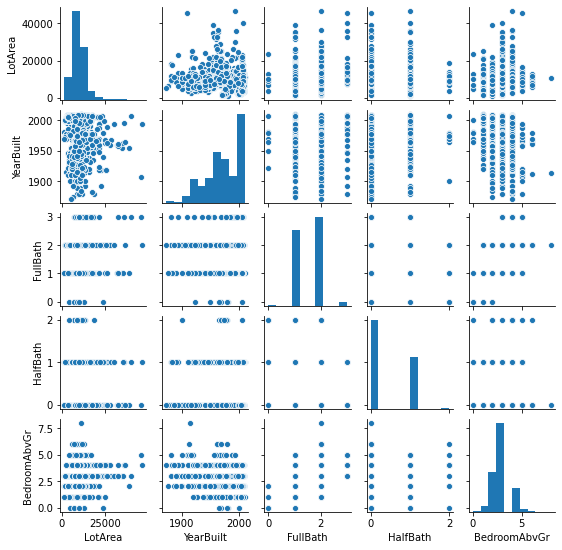

In [29]:
sns.pairplot(df3[['LotArea', 'YearBuilt', 'FullBath', 'HalfBath',
       'BedroomAbvGr']], height=1.5)

In [30]:
# split data into X and Y dataframes
X = df3.copy() # independent variables
Y = train['SalePrice'].copy() # dependent variable

In [31]:
# Run regression using statsmodels
import statsmodels.api as sm
import math

X = sm.add_constant(X) # required if a value for alpha is expected
est = sm.OLS(Y,X).fit() # fit model
predictions = est.predict() # get predicted values
print(est.summary())
print("\nAverage error: {:.2f}.".format(math.sqrt(est.mse_resid)))

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.541
Model:                            OLS   Adj. R-squared:                  0.535
Method:                 Least Squares   F-statistic:                     105.3
Date:                Mon, 28 Jun 2021   Prob (F-statistic):          4.06e-228
Time:                        22:48:45   Log-Likelihood:                -17826.
No. Observations:                1449   AIC:                         3.569e+04
Df Residuals:                    1432   BIC:                         3.578e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -1.256e+06      1e+0

## Conclusion ##

1. 19 columns were identified as having NULL values, out of which 4 columns have more than 70 percent were NULL, which were dropped
2. The following attributes were chosen based on our initial correlation analysis; which are some of the common attributest between test datasets 
   LotArea , BldgType,  HouseStyle ,  YearBuilt,    FullBath,   HalfBath ,   BedroomAbvGr
3. Another correlation analysis was performed among the selected attributes to avoid multicollinearity 
4. In order to avoid outliers, LotArea greater than 50,000 sq.ft. were eliminated 
5. Test datasets are gathered from Delaware- Bear, Delaware- Newark, Delaware-Wilmington and the latest data from Iowa- Ames.
6. Full Bath, Half Bath, Year Built and lot area are the most significant predictors in the model
7. With this prediction model, predicted house price  is off by an average of  $53,600
8. The R^2 statistic shows how well the model explains SalePrice.
9. In this model, since R^2 and Adjusted R^2 are close, model is not overfit.
